<a href="https://www.kaggle.com/code/vaibhav2851/black-friday-eda?scriptVersionId=138145371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### About Dataset
Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Tasks to perform



Purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

DATA PREPROCESSING

Check basic statistics of dataset

Check for missing values in the data

check for unique values in data

Perform EDA

Purchase Distribution

check for outliers

Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc

Drop unnecessary fields

Convert categorical data into integer using map function (e.g 'Gender' column)

missing value treatment

Rename columns

fill nan values

map range variables into integers (e.g 'Age' column)

Data Visualisation

visualize individul column
Age vs Purchased
Occupation vs Purchased
Product_category_1 vs Purchased
Product_category_2 vs Purchased
Product_category_3 vs Purchased
City category pie chart
check for more possible plots
All the Best!!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
black_friday = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")


In [2]:
### Read Dataset

In [3]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
black_friday.shape

(550068, 12)

In [6]:
black_friday.describe() # Staticstical information of numeric data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Checking Null values

In [7]:
black_friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Checking unique values

In [8]:
black_friday.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Deleting null values

In [10]:
black_friday.dropna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,F,46-50,0,B,4+,1,3,4.0,12.0,8047
545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,1006040,P00277642,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [11]:
# renaming values 
black_friday['Gender']=black_friday['Gender'].map({'M':0,'F':1})

In [12]:
black_friday.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

### Creating group of multiple values

In [13]:
black_friday['Age']=black_friday['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':6,'51-55':6,'55+':7})

In [14]:
black_friday['Product_Category_2']=black_friday['Product_Category_2'].fillna(int(black_friday['Product_Category_2'].mean()))
black_friday['Product_Category_3']=black_friday['Product_Category_3'].fillna(int(black_friday['Product_Category_3'].mean()))

In [15]:
black_friday['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
black_friday.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
black_friday.Age.unique()

array([1, 7, 3, 6, 4, 2])

In [18]:
black_friday.Purchase.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

### Finding outliers

<Axes: >

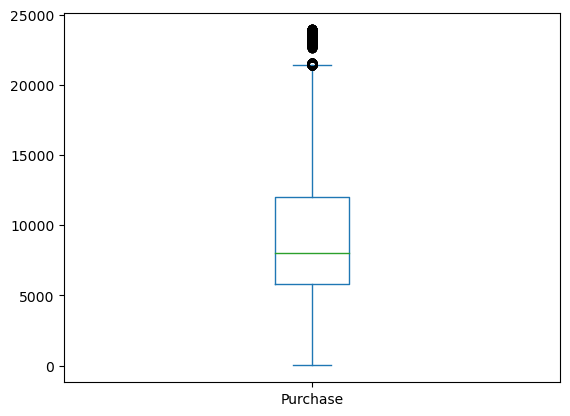

In [19]:
black_friday.Purchase.plot(kind='box')

In [20]:
imax=black_friday['Purchase'].quantile([0.25,0.75]).max()
imin=black_friday['Purchase'].quantile([0.25,0.75]).min()

iqr = imax - imin
iqr

6231.0

In [21]:
# InterQuartile Range (IQR): 25th to the 75th percentile. IQR tells how spread the middle values 
# “maximum”: Q3 + 1.5*IQR
# “minimum”: Q1 -1.5*IQR

In [22]:
black_friday[black_friday['Purchase'] > 21400]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,0,3,2,B,3,0,10,16.0,12.0,23603
375,1000062,P00119342,1,4,3,A,1,0,10,13.0,12.0,23792
652,1000126,P00087042,0,2,9,B,1,0,10,14.0,16.0,23233
736,1000139,P00159542,1,3,20,C,2,0,10,15.0,16.0,23595
1041,1000175,P00052842,1,3,2,B,1,0,10,15.0,12.0,23341
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,0,3,20,B,1,0,10,13.0,16.0,23753
544704,1005847,P00085342,1,2,4,B,2,0,10,13.0,12.0,23724
544743,1005852,P00202242,1,3,1,A,0,1,10,16.0,12.0,23529
545663,1006002,P00116142,0,6,0,C,1,1,10,13.0,16.0,23663


q1 = pd.DataFrame(normal).quantile(0.25)[0]
q3 = pd.DataFrame(normal).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)
iqr
1.3531456117664944
fence_low
-2.7145351881861703
fence_high
2.698047258879807
 "Outside" boxplot Reviews
normal[(normal < fence_low) | (normal > fence_high)].shape[0]


In [23]:
q1 = pd.DataFrame(black_friday.Purchase).quantile(0.25)[0]
q3 = pd.DataFrame(black_friday.Purchase).quantile(0.75)[0]

In [24]:
q1,q3,q3-q1

(5823.0, 12054.0, 6231.0)

In [25]:
high = q3 + (1.5*iqr)
low = q1 - (1.5*iqr)
high,low

(21400.5, -3523.5)

In [26]:
black_friday.Purchase[(black_friday.Purchase < low) | (black_friday.Purchase > high)].shape[0]


2677

In [27]:
black_friday.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
267792,1005269,P00058442,0,2,0,B,4+,0,5,14.0,12.0,3740


In [28]:
import plotly.express as px
fig = px.box(black_friday.Purchase.head())
fig.show()

###  Removing unwanted values

In [29]:
black_friday=black_friday.drop(['User_ID','Product_ID'], axis=True)

### Renaming columns

In [30]:
black_friday=black_friday.rename(columns={'Product_Category_1':'Product_1','Product_Category_2':'Product_2','Product_Category_3':'Product_3'})

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



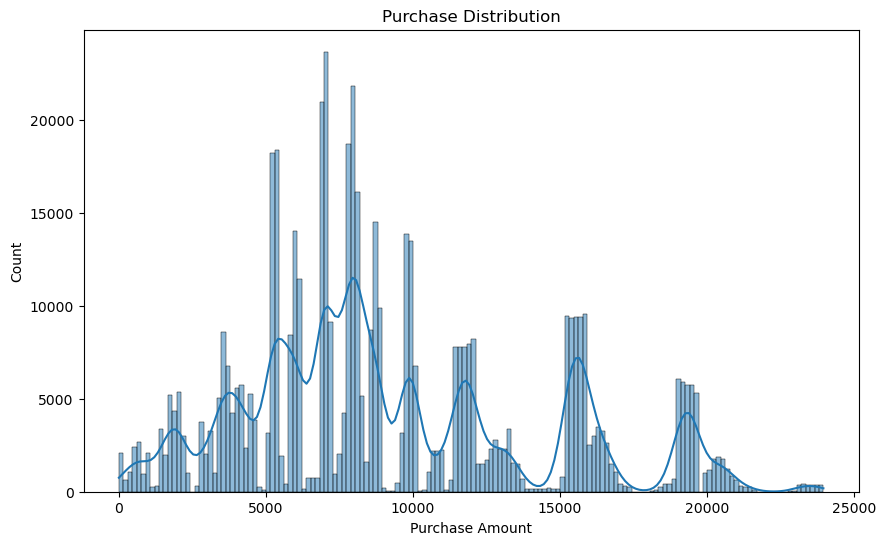

In [31]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(black_friday['Purchase'], kde=True)
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('Purchase Distribution')
plt.show()


<Axes: ylabel='Density'>

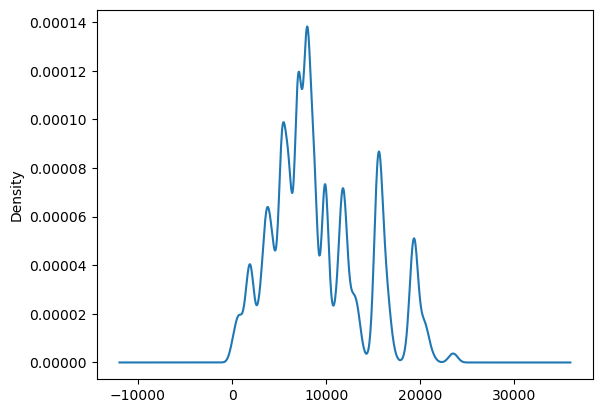

In [32]:
black_friday.Purchase.plot(kind='kde')

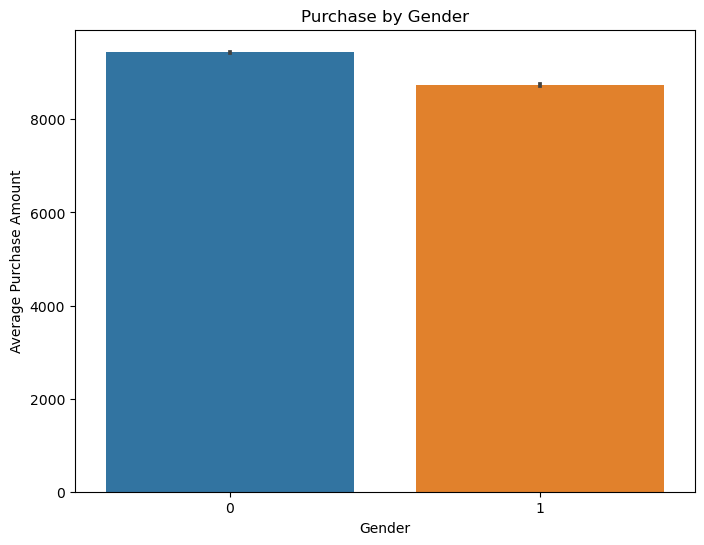

In [33]:
# Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=black_friday)
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Gender')
plt.show()

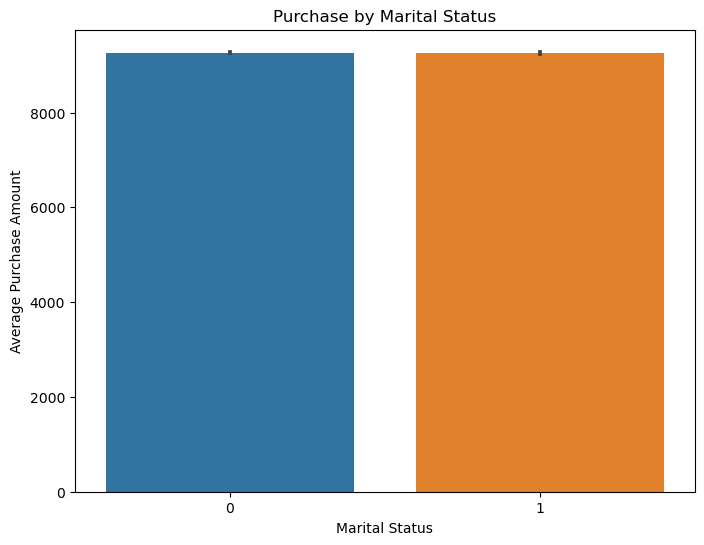

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status', y='Purchase', data=black_friday)
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Marital Status')
plt.show()

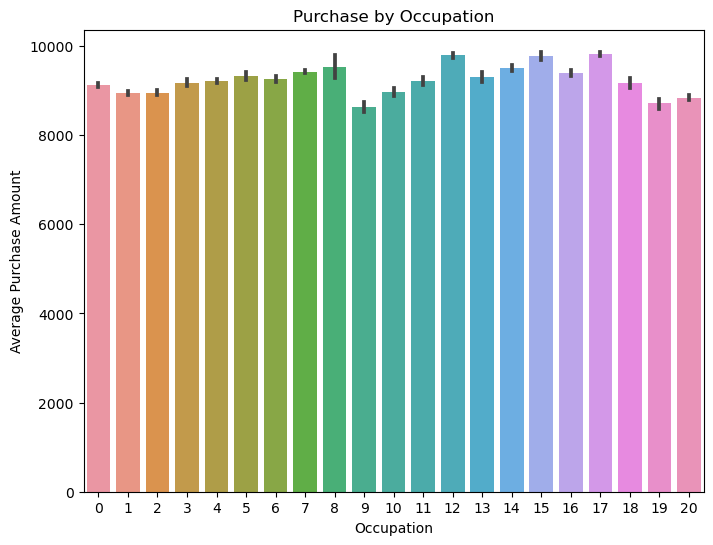

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Occupation', y='Purchase', data=black_friday)
plt.xlabel('Occupation')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Occupation')
plt.show()

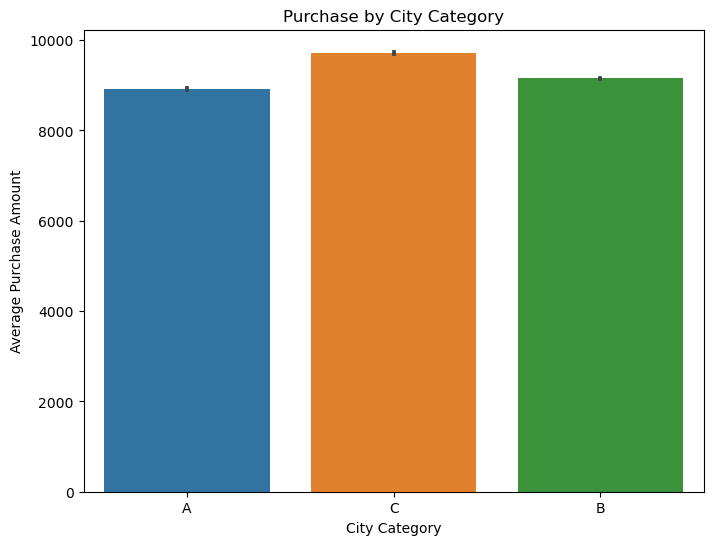

In [36]:
plt.figure(figsize=(8, 6))
sns.barplot(x='City_Category', y='Purchase', data=black_friday)
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by City Category')
plt.show()

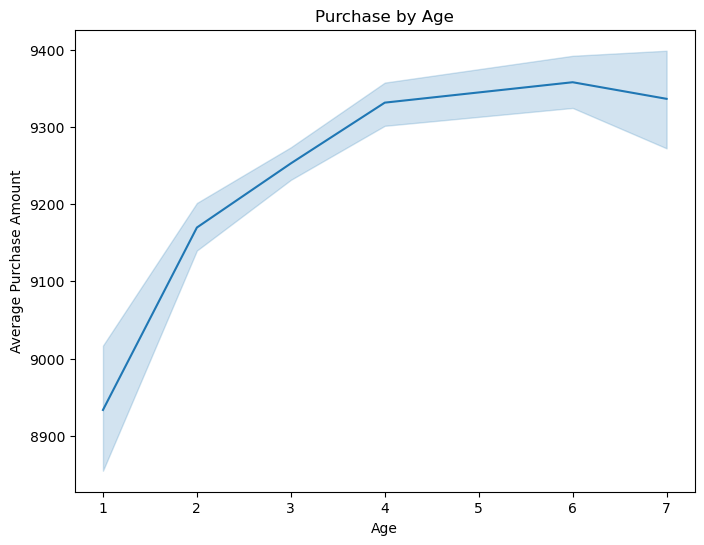

In [37]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Purchase', data=black_friday)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Age')
plt.show()

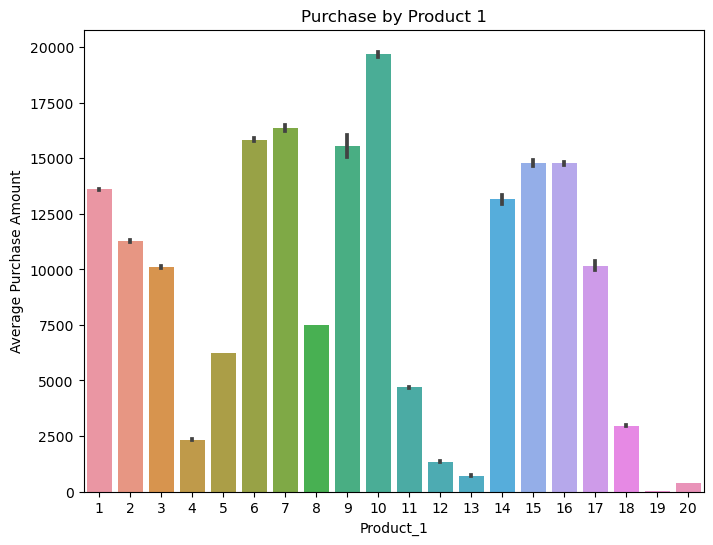

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_1', y='Purchase', data=black_friday)
plt.xlabel('Product_1')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Product 1')
plt.show()

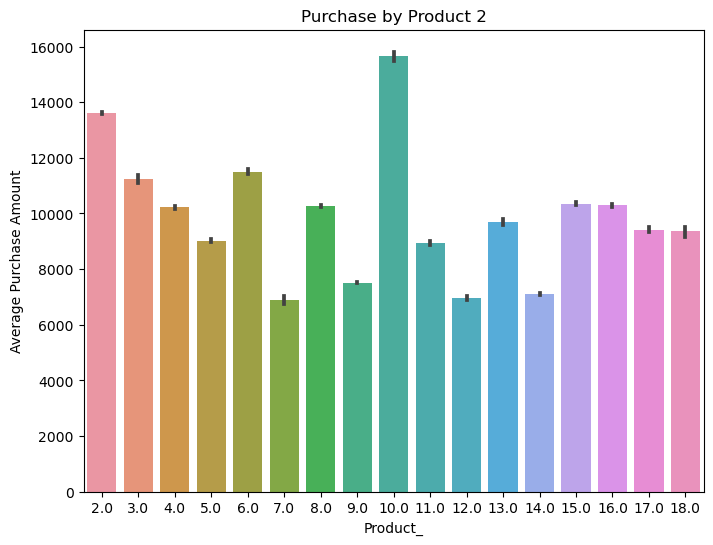

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_2', y='Purchase', data=black_friday)
plt.xlabel('Product_')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Product 2')
plt.show()

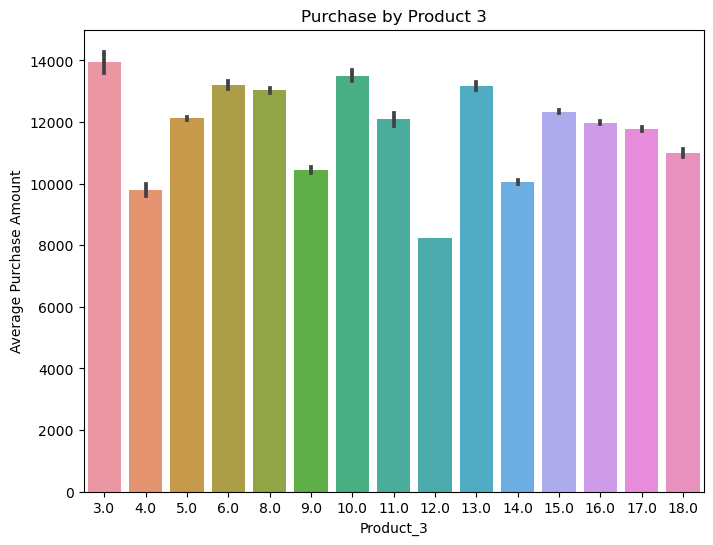

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Product_3', y='Purchase', data=black_friday)
plt.xlabel('Product_3')
plt.ylabel('Average Purchase Amount')
plt.title('Purchase by Product 3')
plt.show()

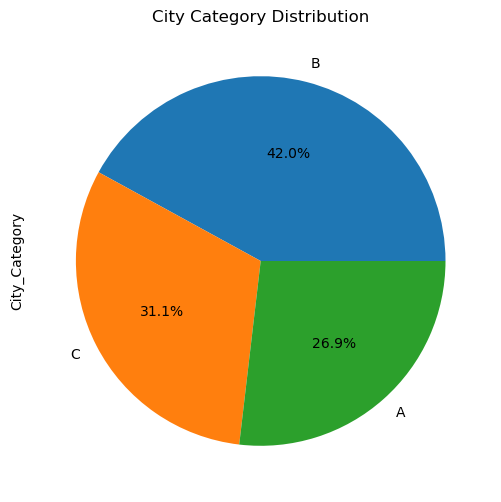

In [41]:
plt.figure(figsize=(8, 6))
black_friday['City_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('City Category Distribution')
plt.show()

<Axes: >

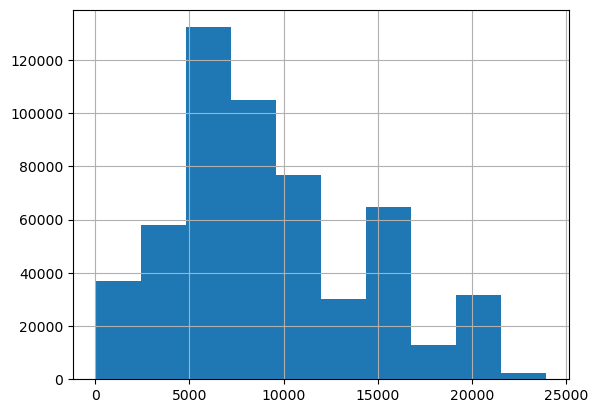

In [42]:
black_friday.Purchase.hist()

<Axes: xlabel='Product_1', ylabel='Purchase'>

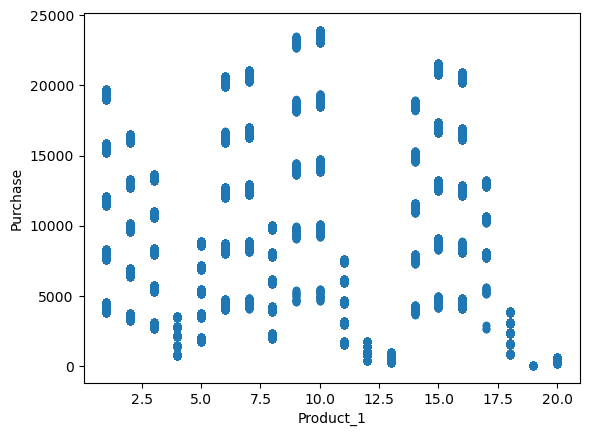

In [43]:
black_friday.plot.scatter(x='Product_1',y='Purchase')

<Axes: xlabel='Occupation', ylabel='Purchase'>

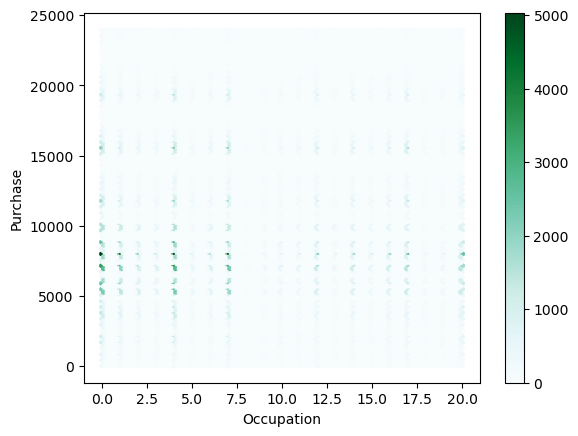

In [44]:
black_friday.plot.hexbin(x='Occupation',y='Purchase')

maximum and minimum product purchased by age group resp. : 26-35 and 0-17 


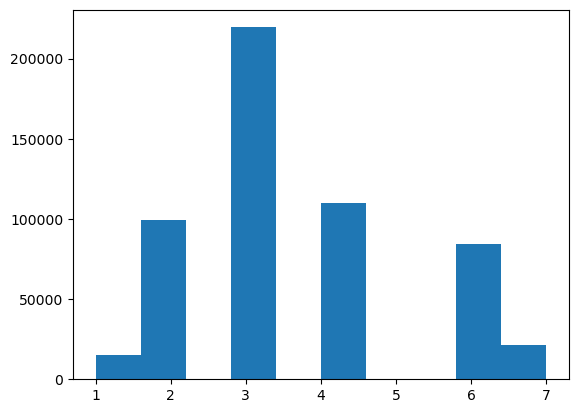

In [45]:
# analysis by age 
# age group = {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':0,'51-55':6,'55+':7}
plt.hist(x=black_friday.Age)
black_friday.Age.value_counts().idxmin()
print('maximum and minimum product purchased by age group resp. : 26-35 and 0-17 ')